In [45]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
import requests


In [96]:
mastermap = gpd.read_file("muni.shp")


In [97]:
#mastermap.set_index(munmx["CVEGEO"].astype(int), inplace = True)
mastermap.head(5)

,AREA,COV_,COV_ID,CVEGEO,CVE_CAB,CVE_ENT,CVE_MUN,NOM_CAB,NOM_ENT,NOM_MUN,PERIMETER,geometry
0,54337.426563,0.0,1.0,01002,0001,01,002,Asientos,Aguascalientes,Asientos,192096.427893,"POLYGON ((2500060.239199999 1133299.9901, 2500..."
1,13777.017689,1.0,2.0,01011,0001,01,011,San Francisco de los Romo,Aguascalientes,San Francisco de los Romo,103689.065058,"POLYGON ((2485534.556000002 1117425.794000002,..."
2,37229.516172,2.0,3.0,01007,0001,01,007,RincÃ³n de Romos,Aguascalientes,RincÃ³n de Romos,161749.880103,"POLYGON ((2480633.530000007 1149057.668199996,..."
3,85779.057493,3.0,4.0,01008,0001,01,008,San JosÃ© de Gracia,Aguascalientes,San JosÃ© de Gracia,181537.600406,"POLYGON ((2463679.819099998 1122454.043300003,..."
4,49989.510265,4.0,5.0,01005,0001,01,005,JesÃºs MarÃ­a,Aguascalientes,JesÃºs MarÃ­a,163500.813411,"POLYGON ((2468125.583600003 1113246.7959, 2468..."


In [35]:
#print(munmx.crs)
# Lambert conformal conic projection WGS84 is epsg =4326
#ax = munmx.to_crs(epsg=4326).plot()
#ax.set_axis_off()

In [94]:
import pandas as pd
master = pd.read_csv("master_noaccent.csv")
#master.index.names = ['CVEGEO'] #potential problem with the id number, is not a string
master.head(10)

,id,Homicides in 2013,Homicide Rate in 2013,3x1 Projects Granted in 2013,Homicides in 2014,Homicide Rate in 2014,3x1 Projects Granted in 2014,NOM_ENT,NOM_MUN
0,1001,19.0,2.383910,6.0,31.0,3.889537,6.0,AGS,Aguascalientes
1,1002,5.0,10.990943,2.0,0.0,0.000000,9.0,AGS,Asientos
2,1003,0.0,0.000000,17.0,2.0,3.694399,10.0,AGS,Calvillo
3,1004,0.0,0.000000,2.0,0.0,0.000000,5.0,AGS,Cosio
4,1005,7.0,7.028818,NaN,6.0,6.024701,2.0,AGS,Jesus Maria
5,1006,1.0,2.388801,1.0,0.0,0.000000,1.0,AGS,Pabellon de Arteaga
6,1007,2.0,4.068679,2.0,1.0,2.034340,3.0,AGS,Rincon de Romos
7,1008,0.0,0.000000,4.0,0.0,0.000000,3.0,AGS,San Jose de Gracia
8,1009,0.0,0.000000,1.0,0.0,0.000000,4.0,AGS,Tepezala
9,1010,1.0,5.311239,NaN,1.0,5.311239,NaN,AGS,El Llano


In [102]:
#mastermap = mastermap.join(master, how= "outer")
mastermap = mastermap.join(master, how = "left" , left_on = 'CVGEO', right_on = 'id') #outer will keep the geometry of all the municipalities

TypeError: join() got an unexpected keyword argument 'left_on'

In [82]:
mastermap=mastermap.fillna(0)

In [83]:
mastermap.head(5)

,AREA,COV_,COV_ID,CVEGEO,CVE_CAB,CVE_ENT,CVE_MUN,NOM_CAB,NOM_ENT_left,NOM_MUN_left,PERIMETER,geometry,Homicides in 2013,Homicide Rate in 2013,3x1 Projects Granted in 2013,Homicides in 2014,Homicide Rate in 2014,3x1 Projects Granted in 2014,NOM_ENT_right,NOM_MUN_right
CVEGEO,,,,,,,,,,,,,,,,,,,,
1001,116635.923614,6.0,7.0,01001,0001,01,001,Aguascalientes,Aguascalientes,Aguascalientes,256631.024148,"POLYGON ((2489959.177600002 1111683.058800004,...",19.0,2.383910,6.0,31.0,3.889537,6.0,AGS,Aguascalientes
1002,54337.426563,0.0,1.0,01002,0001,01,002,Asientos,Aguascalientes,Asientos,192096.427893,"POLYGON ((2500060.239199999 1133299.9901, 2500...",5.0,10.990943,2.0,0.0,0.000000,9.0,AGS,Asientos
1003,92335.783202,9.0,10.0,01003,0001,01,003,Calvillo,Aguascalientes,Calvillo,171636.167073,"POLYGON ((2440783.883699994 1105688.003400005,...",0.0,0.000000,17.0,2.0,3.694399,10.0,AGS,Calvillo
1004,12838.354552,10.0,11.0,01004,0001,01,004,CosÃ­o,Aguascalientes,CosÃ­o,73352.681105,"POLYGON ((2474059.8709 1150395.9081, 2474143.2...",0.0,0.000000,2.0,0.0,0.000000,5.0,AGS,Cosio
1005,49989.510265,4.0,5.0,01005,0001,01,005,JesÃºs MarÃ­a,Aguascalientes,JesÃºs MarÃ­a,163500.813411,"POLYGON ((2468125.583600003 1113246.7959, 2468...",7.0,7.028818,0.0,6.0,6.024701,2.0,AGS,Jesus Maria


In [90]:
#geo_hom_3x1["id"] = geo_hom_3x1["CVEGEO"].str.lower()
#counties = counties[counties["STATEFP"] == "42"].set_index("lname")
ags = mastermap[mastermap["CVE_ENT"] == "01"].set_index("CVEGEO") #, inplace= True)

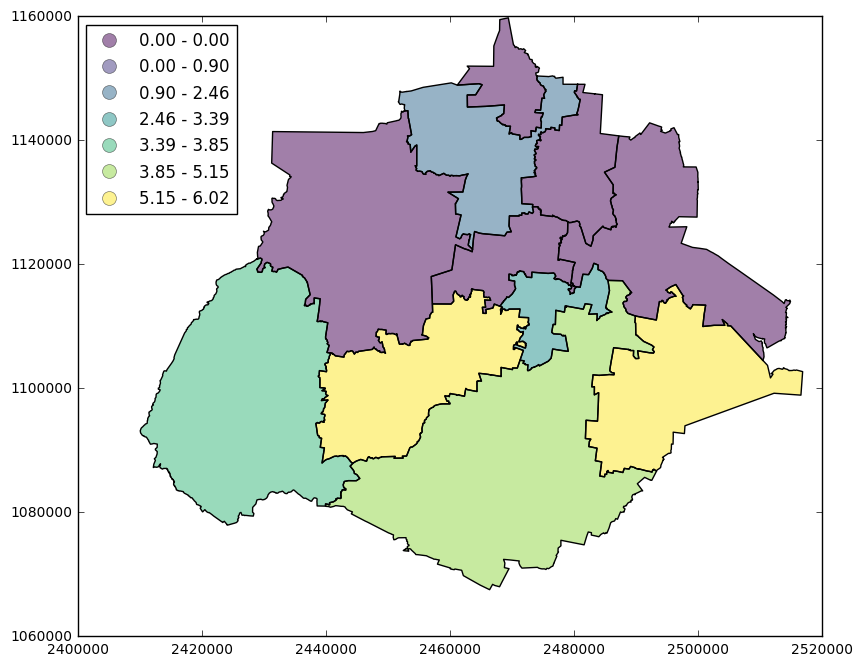

In [91]:
ft = "Homicide Rate in 2014"
ax = ags

ax = ax.plot(scheme = "Quantiles", k = 9, 
             column = ft, figsize = (12, 8), 
             legend = True, cmap = "viridis")


In [89]:
ft = "Homicide Rate in 2013"
ax = ags.to_crs(epsg = 4326).plot(scheme = "EQUAL_INTERVAL", k = 5, column = ft, 
                                     figsize = (16, 10), legend = True, cmap = "rainbow")

ax.set_axis_off()

ValueError: max() arg is an empty sequence

In [1]:
import pysal as ps
import folium
import matplotlib.pyplot as plt

m = folium.Map([29.5, -102], 
               tiles='cartodbpositron', 
               zoom_start = 4, min_zoom = 4)

with open('census.geojson', 'w') as f: f.write(geo_hom_3x1.to_json())

ft = "Homicide Rate in 2013"
threshold_scale = list(ps.esda.mapclassify.Quantiles(geo_hom_3x1[ft], k = 5).bins)
threshold_scale = [geo_hom_3x1[ft].min()] + threshold_scale[:-1] + [0.1 + geo_hom_3x1[ft].max()]

m.choropleth(geo_path = "census.geojson", 
             data = geo_hom_3x1, 
             columns = ['CVEGEO', 'Homicide Rate in 2013'],
             threshold_scale = threshold_scale,
             key_on='feature.properties.CVEGEO',
             fill_opacity = 0.7, line_opacity=0.5,
             fill_color = 'YlGn',
             legend_name='Homicide Rate in 2013')

m.save("mx.html")
m

NameError: name 'geo_hom_3x1' is not defined